In [1]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features, calculate_climb_length, calculate_difficulty, calculate_segment_abilities
import pandas as pd
import numpy as np
import folium

In [2]:
import re

#string from flammerouge
input_string = """
1. Huisepontweg (+, 1700 m, Km 110.8), 2. Oude Kwaremont (+, 2300 m, Km 137.0), 3. Eikenberg (+, 1200 m, Km 155.2), 4. Holleweg (+, 700 m, Km 157.3), 5. Kerkgate (+, 1400 m, Km 164.3), 6. Jagerij (+, 800 m, Km 166.7), 7. Molenberg (+, 300 m, Km 171.6), 8. Berg Ten Houte (+, 400 m, Km 197.1), 9. Oude Kwaremont (+, 2300 m, Km 219.2), 10. Paterberg (+, 400 m, Km 222.6), 11. Koppenberg (+, 600 m, Km 229.2), 12. Mariaborrestraat (+, 2000 m, Km 235.3), 13. Taaienberg (+, 500 m, Km 237.0), 14. Oude Kruisberg (+, 500 m, Km 245.5), 15. Oude Kwaremont (+, 1500 m, Km 257.0), 16. Paterberg (+, 400 m, Km 260.5).
"""

pattern = re.compile(r'(?P<seq>\d+)\.\s*(?P<name>[^,]+)\s*\(\+\s*,\s*(?P<length>\d+)\s*m,\s*Km\s*(?P<end_km>\d+\.\d+)\)')

matches = pattern.finditer(input_string)
cobble_sections = [
    {
        "seq": int(match.group("seq")),
        "name": match.group("name").strip(),
        "length": int(match.group("length")),
        "start_km": float(match.group("end_km"))*1000 - float(match.group("length")),
        "end_km": float(match.group("end_km"))*1000
    }
    for match in matches
]

cobble_sections


[{'seq': 1,
  'name': 'Huisepontweg',
  'length': 1700,
  'start_km': 109100.0,
  'end_km': 110800.0},
 {'seq': 2,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 134700.0,
  'end_km': 137000.0},
 {'seq': 3,
  'name': 'Eikenberg',
  'length': 1200,
  'start_km': 154000.0,
  'end_km': 155200.0},
 {'seq': 4,
  'name': 'Holleweg',
  'length': 700,
  'start_km': 156600.0,
  'end_km': 157300.0},
 {'seq': 5,
  'name': 'Kerkgate',
  'length': 1400,
  'start_km': 162900.0,
  'end_km': 164300.0},
 {'seq': 6,
  'name': 'Jagerij',
  'length': 800,
  'start_km': 165900.0,
  'end_km': 166700.0},
 {'seq': 7,
  'name': 'Molenberg',
  'length': 300,
  'start_km': 171300.0,
  'end_km': 171600.0},
 {'seq': 8,
  'name': 'Berg Ten Houte',
  'length': 400,
  'start_km': 196700.0,
  'end_km': 197100.0},
 {'seq': 9,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 216900.0,
  'end_km': 219200.0},
 {'seq': 10,
  'name': 'Paterberg',
  'length': 400,
  'start_km': 222200.0,
  'end_km': 2

In [29]:
#file_path = 'data/TdF-stage-17-route.gpx'
#file_path = 'data/RvV2023.gpx'
#file_path = 'data/cholet-pays-de-la-loire-2023.gpx'
file_path = 'data/giro-next-gen-2024-stage-3.gpx'
#file_path = 'data/itzulia-2024-stage-6.gpx'
#file_path = 'data/scotland-2023-me-rr.gpx'
#file_path = 'data/tdf-2024-stage-6.gpx'
#file_path = 'data/tour-of-slovenia-2019-stage-4.gpx'
#file_path = 'data/tour-de-france-2024-stage-15.gpx'
#file_path='data/tour-of-slovenia-2019-stage-4.gpx'

regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(pd.DataFrame(regularized_points))

stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}


In [30]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [31]:
raw_points.drop('index', axis=1).drop_duplicates()

,lat,lon,elev,dist,segment_dist
0,45.65276,7.70637,355.0,0.000000,0.000000
1,45.65273,7.70668,354.0,24.324833,24.324833
2,45.65262,7.70729,354.0,73.289964,48.965132
3,45.65256,7.70750,354.0,90.923303,17.633339
4,45.65246,7.70776,354.0,113.989272,23.065968
...,...,...,...,...,...
3844,45.30185,7.19179,1767.0,134224.733541,5.922454
3845,45.30191,7.19172,1767.0,134233.364004,8.630462
3846,45.30194,7.19168,1767.0,134237.937305,4.573301
3847,45.30260,7.18957,1758.0,134418.544804,180.607499


In [32]:
processed_points = features

In [33]:
processed_points

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
0,45.64987,7.71266,354.0,594.039658,594.039658,-0.168339,0.000000,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",,594.039658,Flat
1,45.64640,7.71745,353.0,536.604961,1130.644619,-0.186357,0.000000,0.000000,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...",,536.604961,Flat
2,45.64195,7.71825,355.0,513.233769,1643.878388,0.389686,0.543946,0.000000,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",,513.233769,Flat
3,45.63752,7.71961,361.0,503.866161,2147.744549,1.190792,2.579881,-1.650925,"[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...",,503.866161,Flat
4,45.63379,7.72483,356.0,596.193138,2743.937687,-0.838654,0.000000,-2.376183,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67]",,596.193138,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...
239,45.30271,7.20269,1613.0,549.454213,132301.193298,10.555930,13.341385,3.196049,"[3777, 3778, 3779, 3780, 3781, 3782, 3783, 378...",,8058.387722,Climbing ND
240,45.30224,7.19851,1658.0,519.579293,132820.772591,8.660853,8.660853,0.000000,"[3804, 3805, 3806, 3807, 3808, 3809, 3810, 381...",,8058.387722,Climbing ND
241,45.30255,7.19706,1691.0,552.856894,133373.629485,5.968995,17.358545,-3.621573,"[3830, 3831, 3832, 3833, 3834, 3835, 3836, 383...",,8058.387722,Climbing
242,45.30292,7.19534,1725.0,501.349784,133874.979269,6.781692,7.685170,2.298564,"[3849, 3850, 3851, 3852, 3853, 3854, 3855, 385...",,8058.387722,Climbing ND


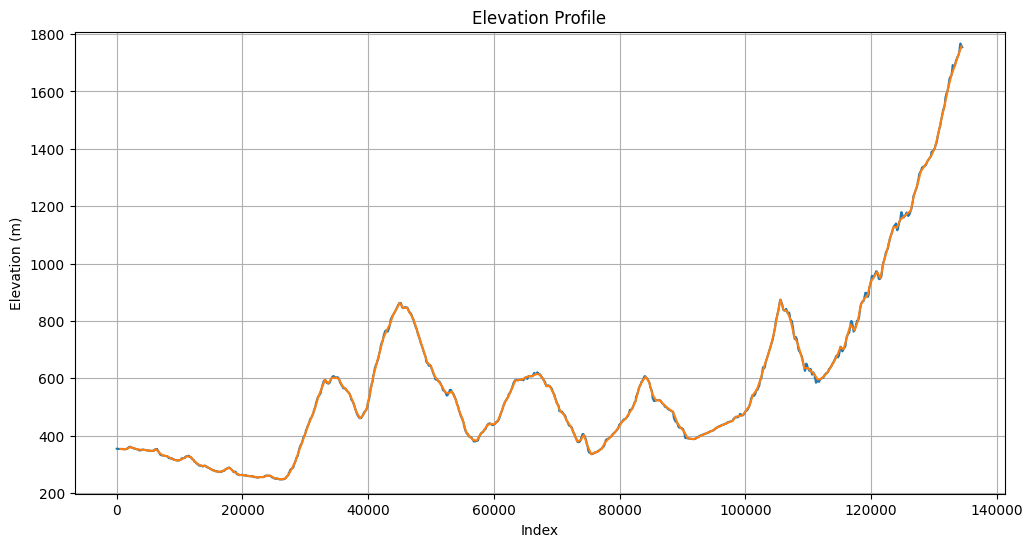

In [34]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
# Set the y-axis limits
plt.ylim(processed_points['elev'].min()-50, processed_points['elev'].max()+50)
plt.grid(True)

plt.show()

In [35]:

m = folium.Map(location=[raw_points['lat'].iloc[0], raw_points['lon'].iloc[0]], zoom_start=9)

folium.PolyLine(locations=list(zip(raw_points['lat'], raw_points['lon'])), color='blue', weight=2.5, opacity=1).add_to(m)
m

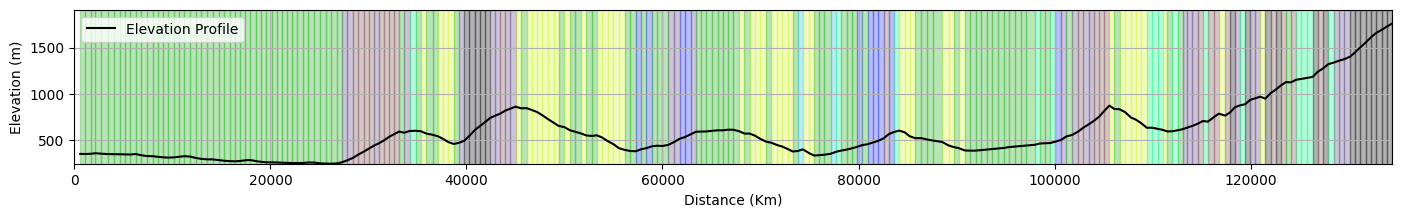

In [36]:
# Convert to DataFrame
#stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

# Define color mapping for types
type_colors = {
    'Flat':	'#15AB11',
    'Sprint':	'#15AB11',
    'Flat Hills':	'#0CF486',
    'Flat Hills ND':	'#0CF486',
    'Hills Flat':	'#18c0e9',
    'Hills Flat ND':	'#18c0e9',
    'Hills':	'#1b29e9',
    'Hills ND':	'#1b29e9',
    'Flat Cobblestone':	'#cfcfcf',
    'Flat Hills Cobblestone':	'#49B27B',
    'Flat Hills Cobblestone ND':	'#49B27B',
    'Hills Cobblestone':	'#757CDC',
    'Hills Cobblestone ND':	'#757CDC',
    'Flat Climbing':	'#65663D',
    'Climbing':	'#000000',
    'Climbing ND':	'#000000',
    'Climbing Hills':	'#774646',
    'Climbing Hills ND':	'#774646',
    'Hills Climbing':	'#583C7C',
    'Hills Climbing ND':	'#583C7C',
    'Cobblestone Flat Climbing':	'#9A9B86',
    'Cobblestone Climbing':	'#C16F6D',
    'Cobblestone Climbing ND':	'#C16F6D',
    'Cobblestone Hills Climbing':	'#9486A6',
    'Cobblestone Hills Climbing ND':	'#9486A6',
    'Downhill':	'#d0f424'
}



only_plot = [] #['Climbing','Climbing ND','Climbing Hills', 'Climbing Hills ND'] #['Climbing', 'Climbing Hills']

if (len(only_plot) > 0):
    for el in type_colors:
        type_colors[el] = 'white' if el not in only_plot  else type_colors[el]


#Flat Time Trial	#1de819
#Flat Hills Time Trial	#16dfba
#Hills Time Trial	#1b29e9
#Cobblestone Time Trial	#cfcfcf
#Hills Cobblestone Time Trial	#757CDC
#Climbing Hills Time Trial	#583C7C
#Climbing Time Trial	#774646
#Downhill Time Trial	#d0f424


# Plot the profile chart
plt.figure(figsize=(17, 2))

# Plot elevation profile line
plt.plot(features_df['dist'], features_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
#for t in type_colors:
for index, row in features_df.iterrows():
    if index > 0:
        plt.fill_betweenx([0, max(features_df['elev'])+150], features_df.iloc[index-1]['dist'], row['dist'], color=type_colors[row['segment_type']], alpha=0.3)

# Set the y-axis limits
plt.xlim(0, np.max(features_df['dist']))
plt.ylim(np.min(features_df['elev']), np.max(features_df['elev']+150))

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
features_df.groupby('segment_type').sum()['delta_dist']

segment_type
Climbing              1096.422429
Climbing Hills         532.107427
Climbing Hills ND    11093.916401
Climbing ND           9005.187623
Downhill             24020.821657
Flat                 60540.701812
Flat Hills            3211.917199
Flat Hills ND         5008.847867
Hills Climbing        1032.923386
Hills Climbing ND    12294.784147
Hills Flat ND         1062.670676
Hills ND              5518.244179
Name: delta_dist, dtype: float64

In [38]:
features_df[(features_df['dist']>120000) & (features_df['dist']<135000)] 

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
217,45.31477,7.32922,953.0,500.903378,120476.972246,3.194229,15.446967,-3.622030,"[3353, 3354, 3355, 3356, 3357, 3358, 3359, 336...",,6261.941827,Hills Climbing
218,45.31288,7.32372,971.0,511.307217,120988.279462,3.520388,7.168999,-2.540691,"[3371, 3372, 3373, 3374, 3375, 3376, 3377, 337...",,6261.941827,Hills Climbing ND
219,45.31196,7.31880,949.0,511.252160,121499.531622,-4.303160,5.706499,-7.257061,"[3386, 3387, 3388, 3389, 3390, 3391, 3392, 339...",,511.252160,Downhill
220,45.31358,7.31282,1008.0,543.093219,122042.624841,10.863697,19.952126,2.721482,"[3403, 3404, 3405, 3406, 3407, 3408, 3409, 341...",,6805.035045,Climbing ND
221,45.31463,7.30811,1047.0,527.763342,122570.388183,7.389676,12.117365,2.336768,"[3423, 3424, 3425, 3426, 3427, 3428, 3429, 343...",,7332.798388,Climbing Hills ND
222,45.31551,7.30212,1093.0,531.223791,123101.611974,8.659251,8.888374,2.735685,"[3449, 3450, 3451, 3452, 3453, 3454, 3455, 345...",,7864.022178,Climbing ND
223,45.31572,7.29584,1128.0,509.806062,123611.418036,6.865356,6.865356,3.585819,"[3473, 3474, 3475, 3476, 3477, 3478, 3479, 348...",,6842.199489,Climbing Hills ND
224,45.31446,7.29006,1125.0,503.246846,124114.664882,-0.596129,5.246499,-9.378048,"[3492, 3493, 3494, 3495, 3496, 3497, 3498, 349...",,503.246846,Flat
225,45.31476,7.28343,1153.0,534.879058,124649.543940,5.234828,11.274401,3.816686,"[3508, 3509, 3510, 3511, 3512, 3513, 3514, 351...",,6842.199489,Climbing Hills ND
226,45.31442,7.27871,1162.0,527.952829,125177.496769,1.704698,15.566088,-8.173795,"[3526, 3527, 3528, 3529, 3530, 3531, 3532, 353...",,527.952829,Flat Hills ND


In [39]:
features_df.iloc[209:222]

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
209,45.31684,7.37629,748.0,582.925974,116231.322733,7.891225,14.081363,1.871084,"[3233, 3234, 3235, 3236, 3237, 3238, 3239, 324...",,6261.941827,Climbing Hills ND
210,45.31893,7.37066,788.0,527.104426,116758.427159,7.588629,12.990882,0.000000,"[3250, 3251, 3252, 3253, 3254, 3255, 3256, 325...",,6261.941827,Climbing Hills ND
211,45.31982,7.36285,767.0,630.872512,117389.299671,-3.328723,6.871124,-21.168143,"[3265, 3266, 3267, 3268, 3269, 3270, 3271, 327...",,630.872512,Downhill
212,45.32073,7.35672,799.0,503.529582,117892.829253,6.355138,10.263299,-2.720992,"[3280, 3281, 3282, 3283, 3284, 3285, 3286, 328...",,6261.941827,Climbing Hills ND
213,45.32216,7.35094,858.0,520.021534,118412.850787,11.345684,15.375617,5.543511,"[3290, 3291, 3292, 3293, 3294, 3295, 3296, 329...",,6261.941827,Climbing ND
214,45.32203,7.34449,877.0,511.375217,118924.226004,3.715471,7.962617,0.000000,"[3303, 3304, 3305, 3306, 3307, 3308, 3309, 331...",,6261.941827,Hills Climbing ND
215,45.32009,7.33870,889.0,513.576174,119437.802177,2.336557,12.662984,-2.589824,"[3315, 3316, 3317, 3318, 3319, 3320, 3321, 332...",,513.576174,Flat Hills
216,45.31790,7.33323,937.0,538.266691,119976.068868,8.917513,9.830761,4.094788,"[3331, 3332, 3333, 3334, 3335, 3336, 3337, 333...",,6261.941827,Climbing ND
217,45.31477,7.32922,953.0,500.903378,120476.972246,3.194229,15.446967,-3.622030,"[3353, 3354, 3355, 3356, 3357, 3358, 3359, 336...",,6261.941827,Hills Climbing
218,45.31288,7.32372,971.0,511.307217,120988.279462,3.520388,7.168999,-2.540691,"[3371, 3372, 3373, 3374, 3375, 3376, 3377, 337...",,6261.941827,Hills Climbing ND


In [40]:
np.cumsum(raw_points.iloc[processed_points[processed_points.delta_dist ==  np.max(processed_points.delta_dist)].indices.values[0]].segment_dist)[50:90]

Series([], Name: segment_dist, dtype: float64)

In [41]:
features_df.segment_type.unique()

array(['Flat', 'Hills Climbing ND', 'Climbing Hills ND', 'Flat Hills ND',
       'Downhill', 'Climbing ND', 'Hills ND', 'Hills Flat ND',
       'Flat Hills', 'Hills Climbing', 'Climbing Hills', 'Climbing'],
      dtype=object)

In [42]:
features_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type
0,45.64987,7.71266,354.0,594.039658,594.039658,-0.168339,0.000000,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",,594.039658,Flat
1,45.64640,7.71745,353.0,536.604961,1130.644619,-0.186357,0.000000,0.000000,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...",,536.604961,Flat
2,45.64195,7.71825,355.0,513.233769,1643.878388,0.389686,0.543946,0.000000,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",,513.233769,Flat
3,45.63752,7.71961,361.0,503.866161,2147.744549,1.190792,2.579881,-1.650925,"[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...",,503.866161,Flat
4,45.63379,7.72483,356.0,596.193138,2743.937687,-0.838654,0.000000,-2.376183,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67]",,596.193138,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...
239,45.30271,7.20269,1613.0,549.454213,132301.193298,10.555930,13.341385,3.196049,"[3777, 3778, 3779, 3780, 3781, 3782, 3783, 378...",,8058.387722,Climbing ND
240,45.30224,7.19851,1658.0,519.579293,132820.772591,8.660853,8.660853,0.000000,"[3804, 3805, 3806, 3807, 3808, 3809, 3810, 381...",,8058.387722,Climbing ND
241,45.30255,7.19706,1691.0,552.856894,133373.629485,5.968995,17.358545,-3.621573,"[3830, 3831, 3832, 3833, 3834, 3835, 3836, 383...",,8058.387722,Climbing
242,45.30292,7.19534,1725.0,501.349784,133874.979269,6.781692,7.685170,2.298564,"[3849, 3850, 3851, 3852, 3853, 3854, 3855, 385...",,8058.387722,Climbing ND


In [43]:
terrains_df = pd.read_csv('Porcentajes.csv')
terrains_df

,Type,Stamina,Sprint,Climbing,Flat,Cobblestone,Technique,Downhill,Hills,Aggressiveness,Time Trial,Teamwork,Total,Total menos resis
0,Flat,0.7,0.0,0.0,0.6,0.0,0.1,0.0,0.0,0.8,0.0,0.5,1,0.3
1,Sprint,0.3,0.7,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.6,1,0.7
2,Flat Hills,0.1,0.0,0.0,0.4,0.0,0.9,0.6,0.1,0.9,0.0,0.1,1,0.9
3,Flat Hills ND,0.3,0.0,0.0,0.7,0.0,0.5,0.0,0.4,0.1,0.0,0.1,1,0.7
4,Hills Flat,0.3,0.0,0.0,0.4,0.0,0.8,0.1,0.8,0.1,0.0,0.7,1,0.7
5,Hills Flat ND,0.6,0.0,0.0,0.7,0.0,0.4,0.0,0.2,0.2,0.0,0.9,1,0.4
6,Hills,0.6,0.0,0.0,0.0,0.0,0.6,0.3,0.1,0.1,0.0,0.3,1,0.4
7,Hills ND,0.2,0.0,0.0,0.0,0.0,0.4,0.0,0.6,0.2,0.0,0.4,1,0.8
8,Flat Cobblestone,0.4,0.0,0.0,0.5,0.2,0.1,0.0,0.0,0.4,0.0,0.4,1,0.6
9,Flat Hills Cobblestone,0.4,0.0,0.0,0.5,0.7,0.1,0.5,0.1,0.5,0.0,0.3,1,0.6


In [44]:
#calculate_difficulty(segment_type, climb_length, gradient, feature_length):
features_df['difficulty'] = features_df.apply(lambda x : calculate_difficulty(x.segment_type, x.climb_length, x.gradient, x.dist), axis=1)

In [45]:
features_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type,difficulty
0,45.64987,7.71266,354.0,594.039658,594.039658,-0.168339,0.000000,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",,594.039658,Flat,0.000000
1,45.64640,7.71745,353.0,536.604961,1130.644619,-0.186357,0.000000,0.000000,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...",,536.604961,Flat,0.000000
2,45.64195,7.71825,355.0,513.233769,1643.878388,0.389686,0.543946,0.000000,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",,513.233769,Flat,0.649477
3,45.63752,7.71961,361.0,503.866161,2147.744549,1.190792,2.579881,-1.650925,"[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...",,503.866161,Flat,1.984654
4,45.63379,7.72483,356.0,596.193138,2743.937687,-0.838654,0.000000,-2.376183,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67]",,596.193138,Flat,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,45.30271,7.20269,1613.0,549.454213,132301.193298,10.555930,13.341385,3.196049,"[3777, 3778, 3779, 3780, 3781, 3782, 3783, 378...",,8058.387722,Climbing ND,22.593216
240,45.30224,7.19851,1658.0,519.579293,132820.772591,8.660853,8.660853,0.000000,"[3804, 3805, 3806, 3807, 3808, 3809, 3810, 381...",,8058.387722,Climbing ND,19.434755
241,45.30255,7.19706,1691.0,552.856894,133373.629485,5.968995,17.358545,-3.621573,"[3830, 3831, 3832, 3833, 3834, 3835, 3836, 383...",,8058.387722,Climbing,14.948325
242,45.30292,7.19534,1725.0,501.349784,133874.979269,6.781692,7.685170,2.298564,"[3849, 3850, 3851, 3852, 3853, 3854, 3855, 385...",,8058.387722,Climbing ND,16.302821


In [47]:
#calculate_segment_abilities(segment_type, distance, is_tt)
features_df['abilities'] = features_df.apply(lambda x: calculate_segment_abilities(terrains_df, x.segment_type, x.dist, False), axis=1)

In [48]:
features_df.iloc[-1]

lat                                                       45.3026
lon                                                       7.18957
elev                                                       1758.0
delta_dist                                             543.565535
dist                                                134418.544804
gradient                                                 6.071025
max_gradient                                            10.740176
min_gradient                                            -4.983182
indices         [3876, 3877, 3878, 3879, 3880, 3881, 3882, 388...
feature_type                                                     
climb_length                                          8058.387722
segment_type                                             Climbing
difficulty                                              15.118375
abilities       {'Stamina': 0.22403090800599332, 'Sprint': 0.0...
Name: 243, dtype: object

In [53]:
features_df.iloc[-1].abilities

{'Stamina': 0.22403090800599332,
 'Sprint': 0.0,
 'Climbing': 0.4178295110736958,
 'Flat': 0.0,
 'Technique': 0.059689930153385126,
 'Downhill': 0.11937986030677025,
 'Hills': 0.0,
 'Aggressiveness': 0.0,
 'Teamwork': 0.17906979046015536}

In [50]:
features_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,climb_length,segment_type,difficulty,abilities
0,45.64987,7.71266,354.0,594.039658,594.039658,-0.168339,0.000000,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",,594.039658,Flat,0.000000,"{'Stamina': 0.0034652313383540766, 'Sprint': 0..."
1,45.64640,7.71745,353.0,536.604961,1130.644619,-0.186357,0.000000,0.000000,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...",,536.604961,Flat,0.000000,"{'Stamina': 0.006595426943810077, 'Sprint': 0...."
2,45.64195,7.71825,355.0,513.233769,1643.878388,0.389686,0.543946,0.000000,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",,513.233769,Flat,0.649477,"{'Stamina': 0.00958929059478726, 'Sprint': 0.0..."
3,45.63752,7.71961,361.0,503.866161,2147.744549,1.190792,2.579881,-1.650925,"[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...",,503.866161,Flat,1.984654,"{'Stamina': 0.012528509867114259, 'Sprint': 0...."
4,45.63379,7.72483,356.0,596.193138,2743.937687,-0.838654,0.000000,-2.376183,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67]",,596.193138,Flat,0.000000,"{'Stamina': 0.01600630317402733, 'Sprint': 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,45.30271,7.20269,1613.0,549.454213,132301.193298,10.555930,13.341385,3.196049,"[3777, 3778, 3779, 3780, 3781, 3782, 3783, 378...",,8058.387722,Climbing ND,22.593216,"{'Stamina': 0.7717569609050409, 'Sprint': 0.0,..."
240,45.30224,7.19851,1658.0,519.579293,132820.772591,8.660853,8.660853,0.000000,"[3804, 3805, 3806, 3807, 3808, 3809, 3810, 381...",,8058.387722,Climbing ND,19.434755,"{'Stamina': 0.7747878401142086, 'Sprint': 0.0,..."
241,45.30255,7.19706,1691.0,552.856894,133373.629485,5.968995,17.358545,-3.621573,"[3830, 3831, 3832, 3833, 3834, 3835, 3836, 383...",,8058.387722,Climbing,14.948325,"{'Stamina': 0.22228938247437802, 'Sprint': 0.0..."
242,45.30292,7.19534,1725.0,501.349784,133874.979269,6.781692,7.685170,2.298564,"[3849, 3850, 3851, 3852, 3853, 3854, 3855, 385...",,8058.387722,Climbing ND,16.302821,"{'Stamina': 0.7809373790667855, 'Sprint': 0.0,..."


In [56]:
abilities_df = features_df['abilities'].apply(pd.Series)

In [57]:
abilities_df

,Stamina,Sprint,Climbing,Flat,Technique,Downhill,Hills,Aggressiveness,Teamwork
0,0.003465,0.0,0.000000,0.298960,0.049827,0.000000,0.0,0.398614,0.249134
1,0.006595,0.0,0.000000,0.298021,0.049670,0.000000,0.0,0.397362,0.248351
2,0.009589,0.0,0.000000,0.297123,0.049521,0.000000,0.0,0.396164,0.247603
3,0.012529,0.0,0.000000,0.296241,0.049374,0.000000,0.0,0.394989,0.246868
4,0.016006,0.0,0.000000,0.295198,0.049200,0.000000,0.0,0.393597,0.245998
...,...,...,...,...,...,...,...,...,...
239,0.771757,0.0,0.105343,0.000000,0.000000,0.000000,0.0,0.000000,0.122900
240,0.774788,0.0,0.103944,0.000000,0.000000,0.000000,0.0,0.000000,0.121268
241,0.222289,0.0,0.418767,0.000000,0.059824,0.119648,0.0,0.000000,0.179472
242,0.780937,0.0,0.101106,0.000000,0.000000,0.000000,0.0,0.000000,0.117957


In [58]:
features_df = pd.concat([features_df, abilities_df], axis=1)

In [60]:
features_df = features_df.drop(columns=['abilities'])

In [61]:
features_df.to_csv('full_stage_data.csv')